In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('medical_examination.csv', index_col=0)

In [5]:
df['overweight'] = df['weight'] / df['height'] ** 2 * 10_000

In [6]:
df['overweight'] = df['overweight'].astype(int)

In [6]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,35
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,24
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,29
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23


In [7]:
df.tail()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,27
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31
99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27
99999,20540,1,170,72.0,120,80,2,1,0,0,1,0,25


In [7]:
df.loc[df['overweight'] <= 25, 'overweight'] = 0
df.loc[df['overweight'] > 25, 'overweight'] = 1

In [9]:
df['overweight'].value_counts()

1    40481
0    29519
Name: overweight, dtype: int64

In [10]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [11]:
df.loc[(df['cholesterol'] == 1) & (df['gluc'] == 1), 'cholesterol':'gluc'] = 0

In [12]:
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1
df.loc[df['gluc'] > 1, 'gluc'] = 1

In [13]:
df.tail()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
99996,19066,2,183,105.0,180,90,1,1,0,1,0,1,1
99998,22431,1,163,72.0,135,80,1,1,0,0,0,1,1
99999,20540,1,170,72.0,120,80,1,1,0,0,1,0,0


## Cardio plotting

In [8]:
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1
df.loc[df['gluc'] == 1, 'gluc'] = 0
df.loc[df['gluc'] > 1, 'gluc'] = 1

In [15]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,1,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,1,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


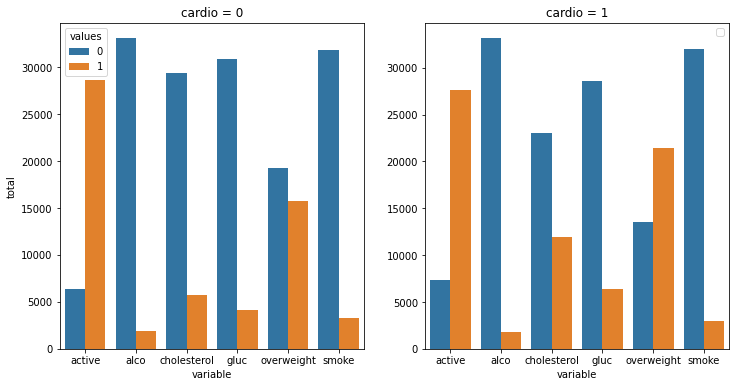

In [12]:
cats = df[['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke', 'cardio']]
df_cat = cats.melt(id_vars='cardio', value_vars=cats.columns, var_name='variable', value_name='values')

fig, (ax0, ax1) = plt.subplots(figsize=(12, 6), nrows=1, ncols=2)

sns.countplot(x='variable', hue='values', data=df_cat[df_cat['cardio'] == 0], ax=ax0)
sns.countplot(x='variable', hue='values', data=df_cat[df_cat['cardio'] == 1], ax=ax1)

ax0.set(title='cardio = 0', ylabel='total')
ax1.set(title='cardio = 1', ylabel=None)
ax1.legend([])

fig.savefig('catplot.jpg', bbox_inches='tight')
# fig = sns.catplot(x='variable', col='cardio', hue='values', data=df_cat, kind='count')
# fig.set_axis_labels('variable', 'total')